# Project: TMDb movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project I will be analysing data set that contains information about 10,000 movies, collected from The Movie Database(TMDb). And in particular I will be interested in finding which genre had a highest vote count, most popularity and the greatest revenue. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#load dataset
mov = pd.read_csv('tmdb-movies.csv')

In [3]:
# the shape of the nics data
mov.shape

(10866, 21)

In [4]:
mov.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Dropping columns that i wont use in my analysis

In [6]:
mov.drop(['homepage','tagline','keywords'], axis =1, inplace = True)

In [7]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

In [8]:
mov.duplicated().sum()

1

Dropping a duplicate row

In [9]:
mov.drop_duplicates(inplace= True)

In [10]:
mov.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1  Which genre had a highest vote count, from 2013 to 2015? 
First checking for movies released in 2015.

In [11]:
mov.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [12]:
mov.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


A function to find the maximum genre and its corresponding value based on a given independent variable

In [13]:
def genre(x,y,z):
    mov_2015_gen = x.groupby('genres').mean()[[y]]
    count_15 = mov_2015_gen[y].max()
    if z == "vote_count":
        gen_15 = mov_2015_gen.vote_count.idxmax()
    elif z == "popularity":
        gen_15 = mov_2015_gen.popularity.idxmax()
    elif z == "revenue":
        gen_15 = mov_2015_gen.revenue.idxmax()
    return print('Genre: '+ gen_15, '   Value:',count_15)

Filtering the only the movies that was release in the year 2015

In [14]:
#select the sample with moveis release in 2015
mov_2015 = mov.query('release_year == 2015')

The box plot below shows the overview of 2015 movies budget and revenue

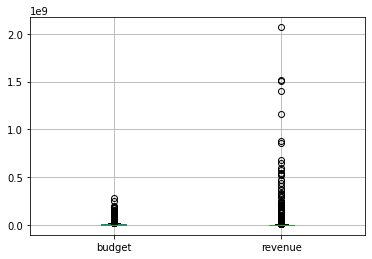

In [15]:
boxplot = mov_2015.boxplot(column=['budget', 'revenue'])

The graph below shows the an overview of budget of movies release in 2015

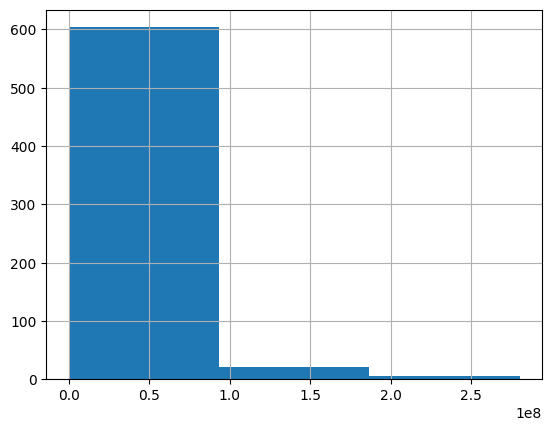

In [16]:
hist = mov_2015['budget'].hist(bins=3)

Filtering the only the movies that was release in the year 2014

In [17]:
#select the sample with moveis release in 2014
mov_2014 = mov.query('release_year == 2014')

The box plot below shows the overview of 2014 movies budget and revenue

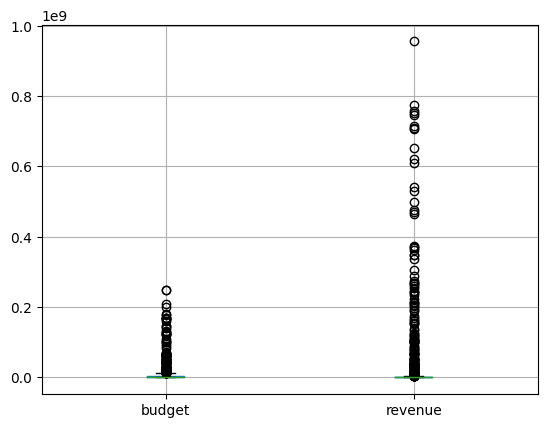

In [18]:
boxplot = mov_2014.boxplot(column=['budget', 'revenue'])

The graph below shows the an overview of budget of movies release in 2014

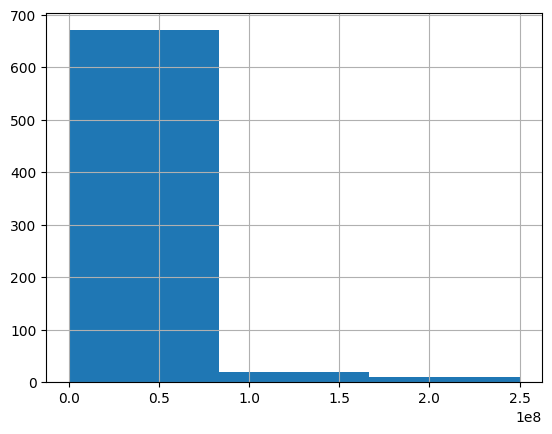

In [19]:
hist = mov_2014['budget'].hist(bins=3)

Filtering the only the movies that was release in the year 2013

In [20]:
#select the sample with moveis release in 2013
mov_2013 = mov.query('release_year == 2013')

The box plot below shows the overview of 2013 movies budget and revenue

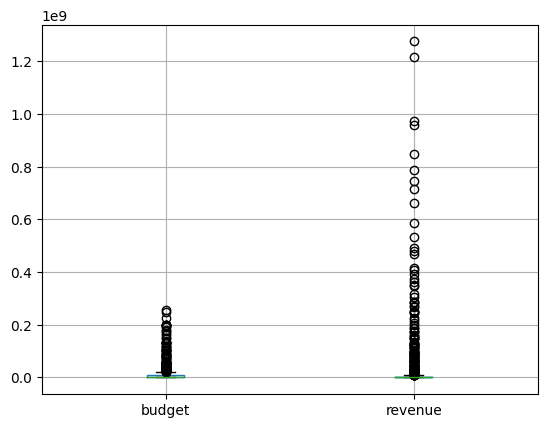

In [21]:
boxplot = mov_2013.boxplot(column=['budget', 'revenue'])

The graph below shows the an overview of budget of movies release in 2013

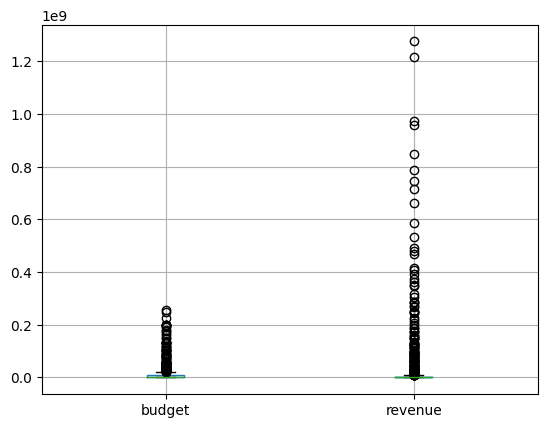

In [22]:
boxplot = mov_2013.boxplot(column=['budget', 'revenue'])

Finding the Genre that had the most vote count in 2015

In [23]:
#the most vote count genre in 2015
genre(mov_2015,'vote_count',"vote_count")

Genre: Action|Adventure|Science Fiction|Thriller    Value: 5873.5


Finding the Genre that had the greatest vote count in 2014

In [24]:
#the most vote count genre in 2014
genre(mov_2014,'vote_count',"vote_count")

Genre: Adventure|Drama|Science Fiction    Value: 6498.0


Finding the Genre that had the greatest vote count 2013

In [25]:
#the most vote count genre in 2013
genre(mov_2013,'vote_count',"vote_count")

Genre: Action|Adventure|Fantasy|Science Fiction    Value: 4729.0


Creating variables for the Graph below

In [26]:
mov_2015_gen = mov_2015.groupby('genres').mean()[['vote_count']]
count_15 = mov_2015_gen['vote_count'].max()

mov_2014_gen = mov_2014.groupby('genres').mean()[['vote_count']]
count_14 = mov_2014_gen['vote_count'].max()

mov_2013_gen = mov_2013.groupby('genres').mean()[['vote_count']]
count_13 = mov_2013_gen['vote_count'].max()

A graph displaying the Highest vote Count Genre from 2013 to 2015

Text(0, 0.5, 'Vote Count')

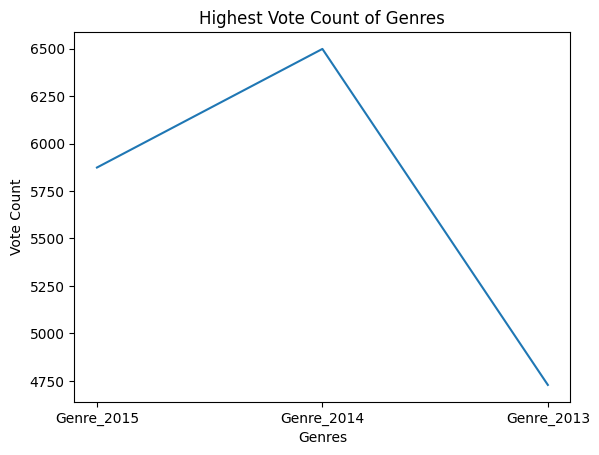

In [27]:
names = ['Genre_2015','Genre_2014','Genre_2013']
height = [count_15,count_14,count_13]
plt.plot(names,height)
plt.title('Highest Vote Count of Genres')
plt.xlabel('Genres')
plt.ylabel('Vote Count')

###  Question 2  Which genre are most popular from 2013 to 2015?  

Most popular Genre in 2015 and its mean value

In [28]:
#finding the most popular genre in 2015
genre(mov_2015,'popularity',"popularity")

Genre: Action|Adventure|Science Fiction|Thriller    Value: 30.7028495


The name of the most popular genre in the year 2014 and its mean

In [29]:
#finding the most popular genre in 2014
genre(mov_2014,'popularity',"popularity")

Genre: Adventure|Drama|Science Fiction    Value: 24.949134


The mean value of the most popular Genre in the year 2013 and the name of the Genre

In [30]:
#finding the most popular genre in 2013
genre(mov_2013,'popularity',"popularity")

Genre: Science Fiction|Thriller|Drama    Value: 5.242753


Creating variables for the graph

In [31]:
mov_2015_gen = mov_2015.groupby('genres').mean()[['popularity']]
pop_15 = mov_2015_gen['popularity'].max()

mov_2014_gen = mov_2014.groupby('genres').mean()[['popularity']]
pop_14 = mov_2014_gen['popularity'].max()

mov_2013_gen = mov_2013.groupby('genres').mean()[['popularity']]
pop_13 = mov_2013_gen['popularity'].max()

A graph showing the most popular Genre from 2013 to 2015

Text(0, 0.5, 'Popularity')

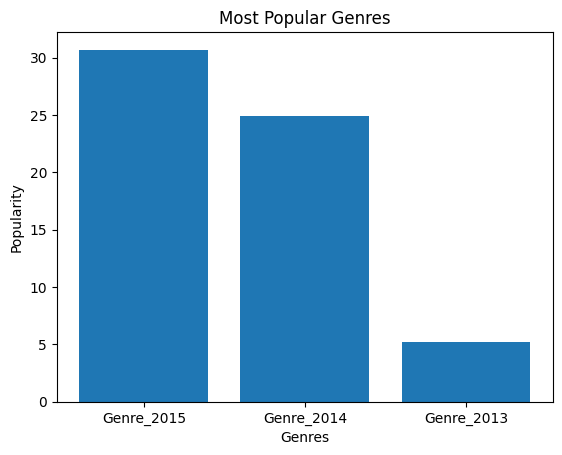

In [32]:
#relationship between the genres
names = ['Genre_2015','Genre_2014','Genre_2013']
height = [pop_15,pop_14,pop_13]
plt.bar(names,height )
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')

### Question 3 Which genre had the greatest revenue?  

The name of the *Genre* and the amount of revenue generated in the year 2015

In [33]:
#finding the genre which had greatest revenue in 2015
genre(mov_2015,'revenue',"revenue")

Genre: Action|Adventure|Science Fiction|Fantasy    Value: 2068178225.0


The name of the *Genre* and the amount of revenue generated in the year 2014

In [34]:
#finding the genre which had greatest revenue in 2014
genre(mov_2014,'revenue',"revenue")

Genre: Action|Science Fiction|Adventure    Value: 773312399.0


The name of the *Genre* and the amount of revenue generated in the year 2013

In [35]:
#finding the genre which had greatest revenue in 2013
genre(mov_2013,'revenue',"revenue")

Genre: Adventure|Fantasy    Value: 958400000.0


Creating variables to be use in the graph

In [36]:
mov_2015_gen = mov_2015.groupby('genres').mean()[['revenue']]
rev_15 = mov_2015_gen['revenue'].max()

mov_2014_gen = mov_2014.groupby('genres').mean()[['revenue']]
rev_14 = mov_2014_gen['revenue'].max()

mov_2013_gen = mov_2013.groupby('genres').mean()[['revenue']]
rev_13 = mov_2013_gen['revenue'].max()

A graph showing the relationship of the revenue of the Genre in their respective years

Text(0, 0.5, 'Revenue')

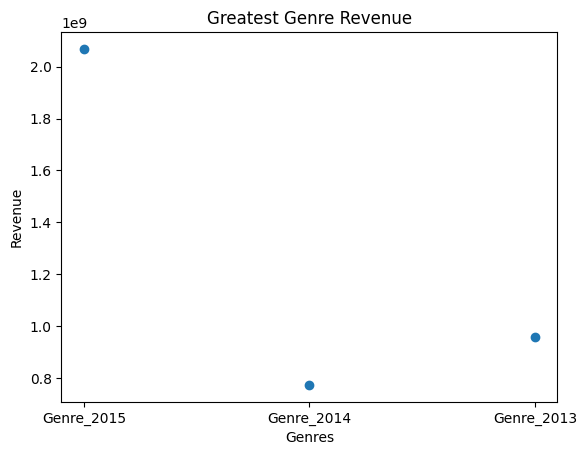

In [37]:
#relationship between the genres
names = ['Genre_2015','Genre_2014','Genre_2013']
height = [rev_15,rev_14,rev_13]
plt.scatter(names,height)
plt.title('Greatest Genre Revenue');
plt.xlabel('Genres')
plt.ylabel('Revenue')

<a id='conclusions'></a>
## Conclusions

### Base on the analysis done,
1. The genre which had the highest vote count from 2013 to 2015 is **Action|Science Fiction| Adventure**, with a vote count of *6498* in the year *2014*  
2. The most popular genre from 2013 to 2015 is **Action|Adventure|Science Fiction|Thriller** with a popularity rate of *30.703* in the year *2015*
3. In the year *2015*, **Action|Adventure|Science Fiction|Fantasy** had the greatest revenue of a value of *2068178225.0*   
   
### Limitations
1. I had an issuse with filling na that are string data types
2. Some of the columns had many NA so i drop them, which could be useful as well.